# Machine Learning Use Case "Surface Type Classification"
## Section A - Introduction

Q1 - What kind of data we have?


Q2 - What kind of objective we have?

Q3 - Is there a specific Methodology to follow? OSEMN

## Section B - Rsearch Questions:

RQ1 - What are the main features that help in detecting the surface type? 

RQ2 - How to use these features to classify the surface type? 

RQ3 - How to evaluate the reliability of the model?

## Section C - Research Objectives

RO1 - Utilize IoT sensors to capture x, y, z accelerometer and x, y, z gyroscope data.

RO2 - Employ machine learning techniques to understand patterns and classify surfaces accordingly. 

RO3 - Perform a train-test split to evaluate the performance of the model. 

## Section D - Research Methodology

## Section E - Exploratory Data Analysis (EDA)

#### Section E-1 Loading data


In [1]:
# Import necessary libraries
import pandas as pd # For data frame reading/manipulation
import numpy as np # For mathematical calculations
import matplotlib.pyplot as plt # For plotting

In [2]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('../datasets/Bushra/24_grass_slopy_wet.csv', header = None) # Setting header as 'None' because the data does not have the column names

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/Bushra/22_asphalt_flat_wet.csv', header = None) 

# Concerete Dry Flat Surface DataFrame
CDF = pd.read_csv('../datasets/Bushra/17_concrete_dry_flat.csv', header = None) 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('../datasets/Bushra/14_stones_coarse_wet.csv', header = None)

# Tile Smooth Surface DataFrame
TS = pd.read_csv('../datasets/Bushra/11_tile_smooth.csv', header = None)

In [3]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_tables = {'GSW': GSW, 'AFW': AFW, 'CDF': CDF, 'SCW': SCW, 'TS': TS}

#### Section E-2 Defining Columns names


In [4]:
# for table_name, table in dict_of_tables.items():
#     print(table)

In [5]:
# Define column names
column_names = ['Timestamp', 'x-accelerometer', 'y-accelerometer','z-accelerometer',
               'x-gyroscope','y-gyroscope','z-gyroscope']

# Iterate over each DataFrame in the dictionary and apply the code
for table_name, table in dict_of_tables.items():
    # Assign column names to the DataFrame
    table.columns = column_names

#### Section E-3 Exploring head and tail of each table


In [6]:
# # Exploring head and tail of each table
# print('The top 3 rows of GSW are')
# display(GSW.head(3))

# print('The last 3 rows of GSW are')
# display(GSW.tail(3))

# print('-'*25) # Segmenting between tables

# print('The top 3 rows of AFW are')
# display(AFW.head(3))

# print('The last 3 rows of AFW are')
# display(AFW.tail(3))

# print('-'*25) 
# print('The top 3 rows of CDF are')
# display(CDF.head(3))

# print('The last 3 rows of CDF are')
# display(CDF.tail(3))

# print('-'*25) 

# print('The top 3 rows of GMS are')
# display(GMS.head(3))

# print('The last 3 rows of GMS are')
# display(GMS.tail(3))

# print('-'*25) 

# print('The top 3 rows of CDB are')
# display(CDB.head(3))

# print('The last 3 rows of CDB are')
# display(CDB.tail(3))

# print('-'*25) 

# print('The top 3 rows of ADF are')
# display(ADF.head(3))

# print('The last 3 rows of ADF are')
# display(ADF.tail(3))

# print('-'*25) 


# print('The top 3 rows of TM are')
# display(TM.head(3))

# print('The last 3 rows of TM are')
# display(TM.tail(3))

In [7]:
# Iterate over each DataFrame in the dictionary and print head and tail
for table_name, table in dict_of_tables.items():
    
    print(f'The top 3 rows of {table_name} are')
    display(table.head(3))
    
    print(f'The last 3 rows of {table_name} are')
    display(table.tail(3))
    
    print('-'*50) # Segmenting between tables


The top 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-21 13:46:48.330        -0.049316        -0.229492        -0.989746   
1  2024-03-21 13:46:48.340        -0.036865        -0.238770        -0.980957   
2  2024-03-21 13:46:48.349        -0.037842        -0.240479        -0.977051   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     1.663208    -0.289917     0.381470  
1     1.678467    -0.396728     0.106812  
2     1.785278    -0.442505    -0.045776

The last 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  \
6037  2024-03-21 13:47:48.569         0.007324        -0.151611   
6038  2024-03-21 13:47:48.580         0.004639        -0.156250   
6039  2024-03-21 13:47:48.590         0.002197        -0.157959   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
6037        -0.999023     0.869751     0.137329     0.289917  
6038        -0.997070     0.778198     0.122070     0.152588  
6039        -0.997559     0.885010     0.091553     0.061035

--------------------------------------------------
The top 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:27:23.329         0.007080        -0.037842        -1.012207   
1  2024-03-20 10:27:23.340         0.006592        -0.036865        -1.011963   
2  2024-03-20 10:27:23.350         0.001953        -0.037354        -1.006592   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.717163     0.289917     0.000000  
1     0.671387     0.244141     0.076294  
2     0.778198     0.198364    -0.030518

The last 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  \
8877  2024-03-20 10:28:51.910         0.013672        -0.075928   
8878  2024-03-20 10:28:51.920         0.014648        -0.074951   
8879  2024-03-20 10:28:51.930         0.012207        -0.076172   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
8877        -1.005859     0.686645     0.259399     0.061035  
8878        -1.007080     0.732422     0.259399     0.076294  
8879        -1.008789     0.671387     0.350952     0.122070

--------------------------------------------------
The top 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:03:39.330        -0.012451        -0.043945        -1.011230   
1  2024-03-20 10:03:39.340        -0.015625        -0.044922        -1.010498   
2  2024-03-20 10:03:39.349        -0.016357        -0.044922        -1.009521   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.747681     0.228882     0.061035  
1     0.717163     0.167847     0.000000  
2     0.671387     0.274658    -0.091553

The last 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  \
7997  2024-03-20 10:04:59.130        -0.020264        -0.045166   
7998  2024-03-20 10:04:59.139        -0.020752        -0.043457   
7999  2024-03-20 10:04:59.150        -0.022705        -0.042969   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
7997        -1.010010     0.747681     0.350952     0.000000  
7998        -1.008789     0.762939     0.381470    -0.061035  
7999        -1.007324     0.717163     0.396728    -0.030518

--------------------------------------------------
The top 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:47:20.329        -0.066895        -0.076416        -1.004883   
1  2024-03-20 09:47:20.340        -0.072021        -0.081543        -1.003418   
2  2024-03-20 09:47:20.350        -0.076416        -0.080078        -1.003174   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.640869     0.320435     0.015259  
1     0.778198     0.274658    -0.030518  
2     0.762939     0.183105     0.015259

The last 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  \
9917  2024-03-20 09:48:59.290        -0.097656        -0.060791   
9918  2024-03-20 09:48:59.299        -0.097168        -0.061035   
9919  2024-03-20 09:48:59.310        -0.097900        -0.060791   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
9917        -1.002930     0.823975     0.152588     0.045776  
9918        -1.001953     0.778198     0.183105     0.000000  
9919        -1.002197     0.610352     0.228882     0.030518

--------------------------------------------------
The top 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:34:52.330        -0.004883        -0.042969        -1.011230   
1  2024-03-20 09:34:52.340        -0.005859        -0.042236        -1.008057   
2  2024-03-20 09:34:52.349        -0.004883        -0.042480        -1.009521   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.671387     0.320435     0.045776  
1     0.671387     0.259399     0.000000  
2     0.671387     0.213623    -0.106812

The last 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  \
6677  2024-03-20 09:35:58.970        -0.003662        -0.049805   
6678  2024-03-20 09:35:58.979        -0.003662        -0.048096   
6679  2024-03-20 09:35:58.990        -0.002930        -0.048828   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
6677        -1.006592     0.610352     0.427246    -0.091553  
6678        -1.009521     0.595093     0.442505    -0.015259  
6679        -1.008301     0.656128     0.320435    -0.320435

--------------------------------------------------


#### Section E-4 Checking datatype


In [8]:
# We will loop through each table to find the datatypes of the columns

for table_name, table in dict_of_tables.items():
    print('The table name is', table_name)
    print('table info is')
    display(table.info())
    print('-'*50)

The table name is GSW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6040 non-null   object 
 1   x-accelerometer  6040 non-null   float64
 2   y-accelerometer  6040 non-null   float64
 3   z-accelerometer  6040 non-null   float64
 4   x-gyroscope      6040 non-null   float64
 5   y-gyroscope      6040 non-null   float64
 6   z-gyroscope      6040 non-null   float64
dtypes: float64(6), object(1)
memory usage: 330.4+ KB


None

--------------------------------------------------
The table name is AFW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is CDF
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8000 non-null   object 
 1   x-accelerometer  8000 non-null   float64
 2   y-accelerometer  8000 non-null   float64
 3   z-accelerometer  8000 non-null   float64
 4   x-gyroscope      8000 non-null   float64
 5   y-gyroscope      8000 non-null   float64
 6   z-gyroscope      8000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 437.6+ KB


None

--------------------------------------------------
The table name is SCW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        9920 non-null   object 
 1   x-accelerometer  9920 non-null   float64
 2   y-accelerometer  9920 non-null   float64
 3   z-accelerometer  9920 non-null   float64
 4   x-gyroscope      9920 non-null   float64
 5   y-gyroscope      9920 non-null   float64
 6   z-gyroscope      9920 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.6+ KB


None

--------------------------------------------------
The table name is TS
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6680 non-null   object 
 1   x-accelerometer  6680 non-null   float64
 2   y-accelerometer  6680 non-null   float64
 3   z-accelerometer  6680 non-null   float64
 4   x-gyroscope      6680 non-null   float64
 5   y-gyroscope      6680 non-null   float64
 6   z-gyroscope      6680 non-null   float64
dtypes: float64(6), object(1)
memory usage: 365.4+ KB


None

--------------------------------------------------


In [9]:
# We noticed that the first column 'Timestamp' Dtype is 'object'

#### Section E-5 Fixing 'Timestamp' column datatype into timestamp



In [10]:
for table_name, table in dict_of_tables.items():
    table['Timestamp'] = pd.to_datetime(table['Timestamp']) # using pandas functionality to correct 'Timestamp' column datatype


In [11]:
# randomly checking of one of the tables
GSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        6040 non-null   datetime64[ns]
 1   x-accelerometer  6040 non-null   float64       
 2   y-accelerometer  6040 non-null   float64       
 3   z-accelerometer  6040 non-null   float64       
 4   x-gyroscope      6040 non-null   float64       
 5   y-gyroscope      6040 non-null   float64       
 6   z-gyroscope      6040 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 330.4 KB


#### Section E-6 Sorting by timestamp

In [12]:
for table_name, table in dict_of_tables.items():

    table.sort_values(by='Timestamp', inplace=True) # Sort the table by 'Timestamp' column #Using 'inplace' Argument to apply the changes on the same table

    # Resetting the index after sorting
    table.reset_index(drop=True, inplace=True)



#### Section E-7 Removing 20 seconds (noise at start and ending)

In [13]:
# testing_table = dict_of_tables['GSW']
# testing_table.columns[0]

In [14]:
# testing_table['Timestamp']

In [15]:
# Looping through 'dict_of_tables' that is containing DataFrames

for table_name, table in dict_of_tables.items():
    # Accessing 'Timestamp' column, which is the first column
    timestamp_column = table.columns[0]
    
    # Calculate 20 seconds
    time_delta = pd.Timedelta(seconds=20)
    
    # Filter out the first and last 20 seconds
    filtered_data = table[(table[timestamp_column] >= (table[timestamp_column].iloc[0] + time_delta)) &
                               (table[timestamp_column] <= (table[timestamp_column].iloc[-1] - time_delta))]
    
    # Update the dictionary with filtered data
    dict_of_tables[table_name] = filtered_data


#### Section E-7.5 Exporting the trimmed datasets 

In [16]:
!pwd # checking path working directory 

/Users/bushrajalali/COMP4030-Data-Science-with-Machine-Learning/code


In [17]:
import os

# Highlight the folder path
save_path = '../datasets/Bushra/'

# Iterate through each key-value pair in the dictionary
for table_name, table in dict_of_tables.items():
    # Define the file name for the CSV
    file_name = f"{table_name}_trimmed.csv"
    # Define the file path
    file_path = os.path.join(save_path, file_name)
    
    # Export the DataFrame to a CSV file
    table.to_csv(file_path, index=False)
    
    print(f"Table '{table_name}' exported to '{file_name}' in path '{save_path}'")


Table 'GSW' exported to 'GSW_trimmed.csv' in path '../datasets/Bushra/'
Table 'AFW' exported to 'AFW_trimmed.csv' in path '../datasets/Bushra/'
Table 'CDF' exported to 'CDF_trimmed.csv' in path '../datasets/Bushra/'
Table 'SCW' exported to 'SCW_trimmed.csv' in path '../datasets/Bushra/'
Table 'TS' exported to 'TS_trimmed.csv' in path '../datasets/Bushra/'


#### Section E-8 Create first 10 seconds tables

In [18]:
# firstTimestamp = testing_table['Timestamp'].iloc[0]
# ten_seconds_later = firstTimestamp + pd.Timedelta(seconds=10)

# firstTimestamp
# ten_seconds_later
# testing_table[testing_table['Timestamp'] <= ten_seconds_later]

In [19]:
# dict_of_tables_10_seconds

In [20]:
# for table_name, table in dict_of_tables_10_seconds.items():
#     print(table_name)

In [21]:
dict_of_tables_10_seconds = {} # Creating an empty dictionary to fill it up with 10_seconds tables

# looping through the dictionary of tables
for table_name, table in dict_of_tables.items():

    # get the starting timestamp
    first_timestamp = table['Timestamp'].iloc[0]  # Get the first timestamp
    
    ten_seconds_after_first_timestamp = first_timestamp + pd.Timedelta(seconds=10)  # Calculate 10 seconds after the first timestamp
    first_10_seconds = table[table['Timestamp'] <= ten_seconds_after_first_timestamp]  # Select rows up to 10 seconds after the first timestamp
    dict_of_tables_10_seconds[table_name] = first_10_seconds # Storing the new filtered tables into the new dictionary


In [22]:
# chkecing a random table in the dict_of_tables_5_seconds
# dict_of_tables_10_seconds['ADF']

#### Section E-9 Plotting the first 10 seconds

In [23]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


In [24]:
# Regular Method trying on GSW

In [25]:
# # Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
# fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# # Iterating over each feature column (excluding the timestamp column) in the 'GSW' DataFrame
# for i, feature in enumerate(dict_of_tables_10_seconds['GSW'].columns[1:], 0):
    
#     # Plotting the feature against the timestamp for the 'GSW' DataFrame, with a green color
#     ax[i].plot(dict_of_tables_10_seconds['GSW']['Timestamp'], dict_of_tables_10_seconds['GSW'][feature], color='green')
    
#     # Setting the title for each subplot indicating the DataFrame name ('GSW') and the specific feature being plotted
#     ax[i].set_title('GSW ' + feature)
    
#     # Setting the x-axis label for each subplot
#     ax[i].set_xlabel('Timestamp')
    
#     # Setting the y-axis label for each subplot
#     ax[i].set_ylabel(feature)

# # Displaying the plot
# plt.show()


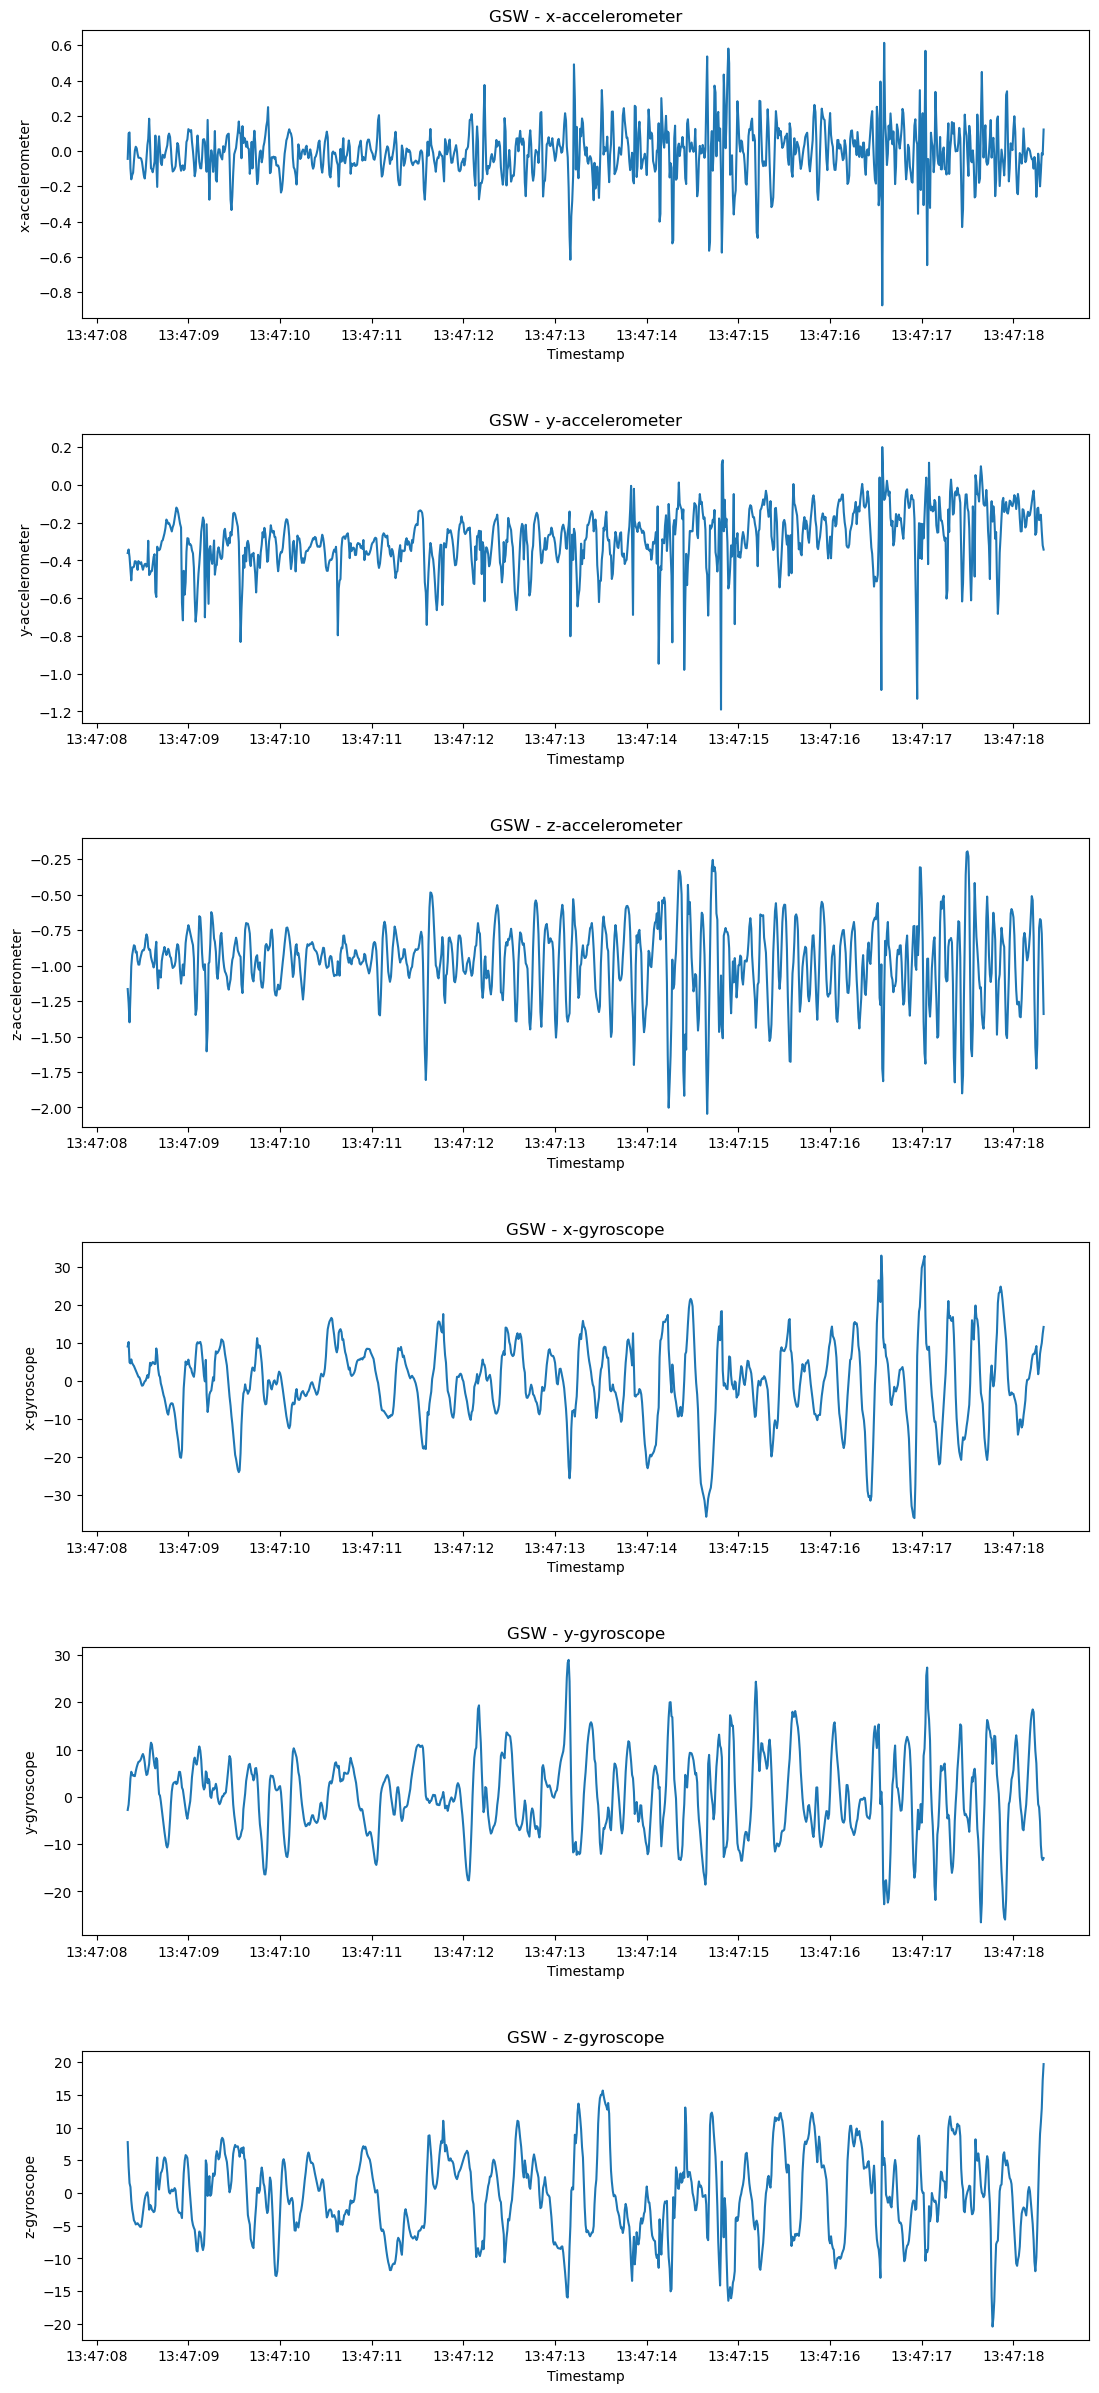

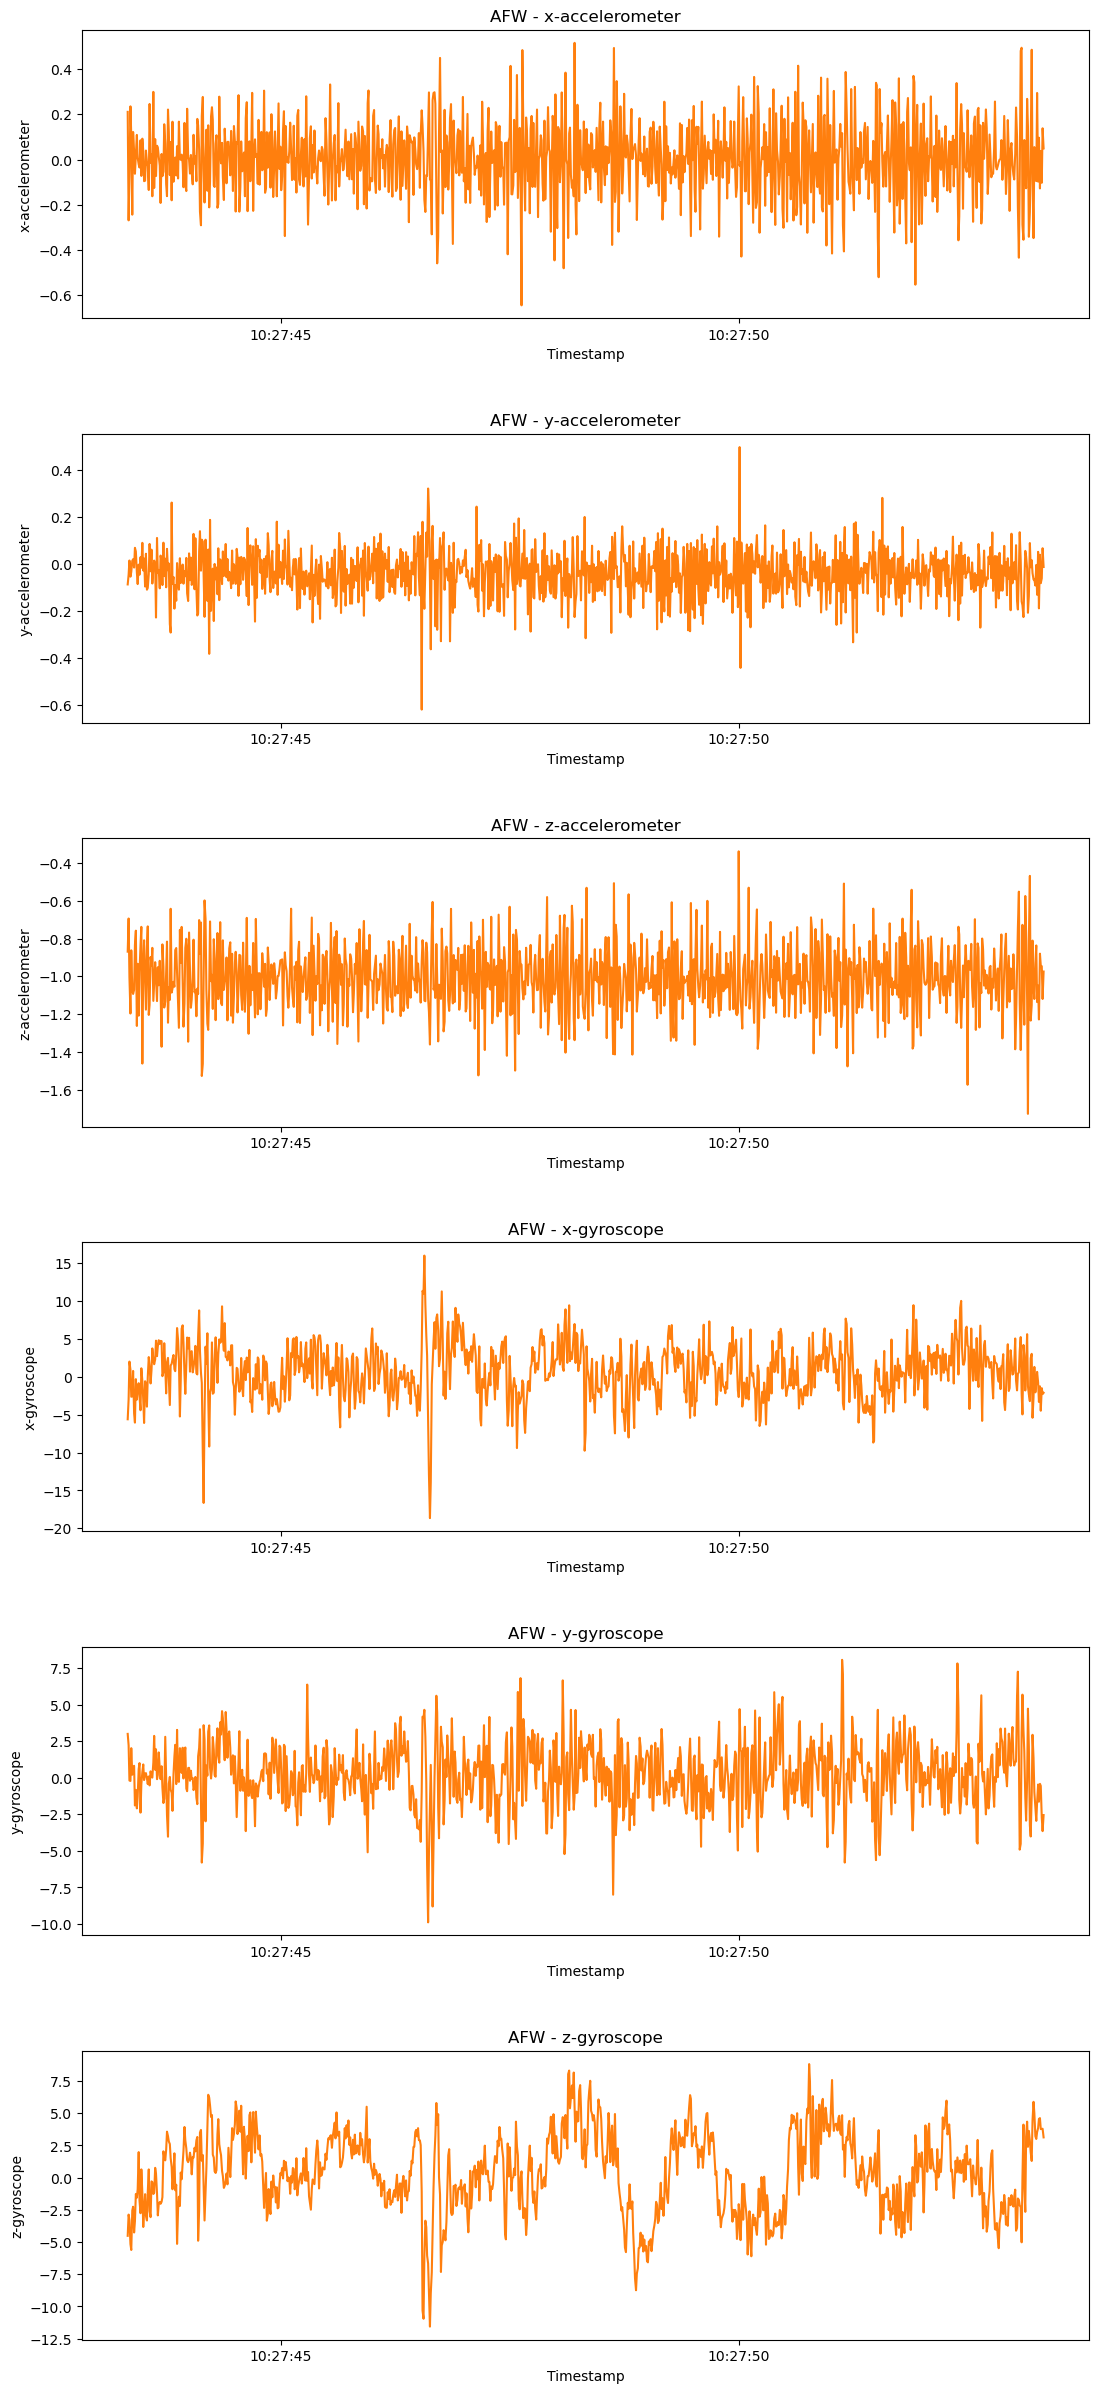

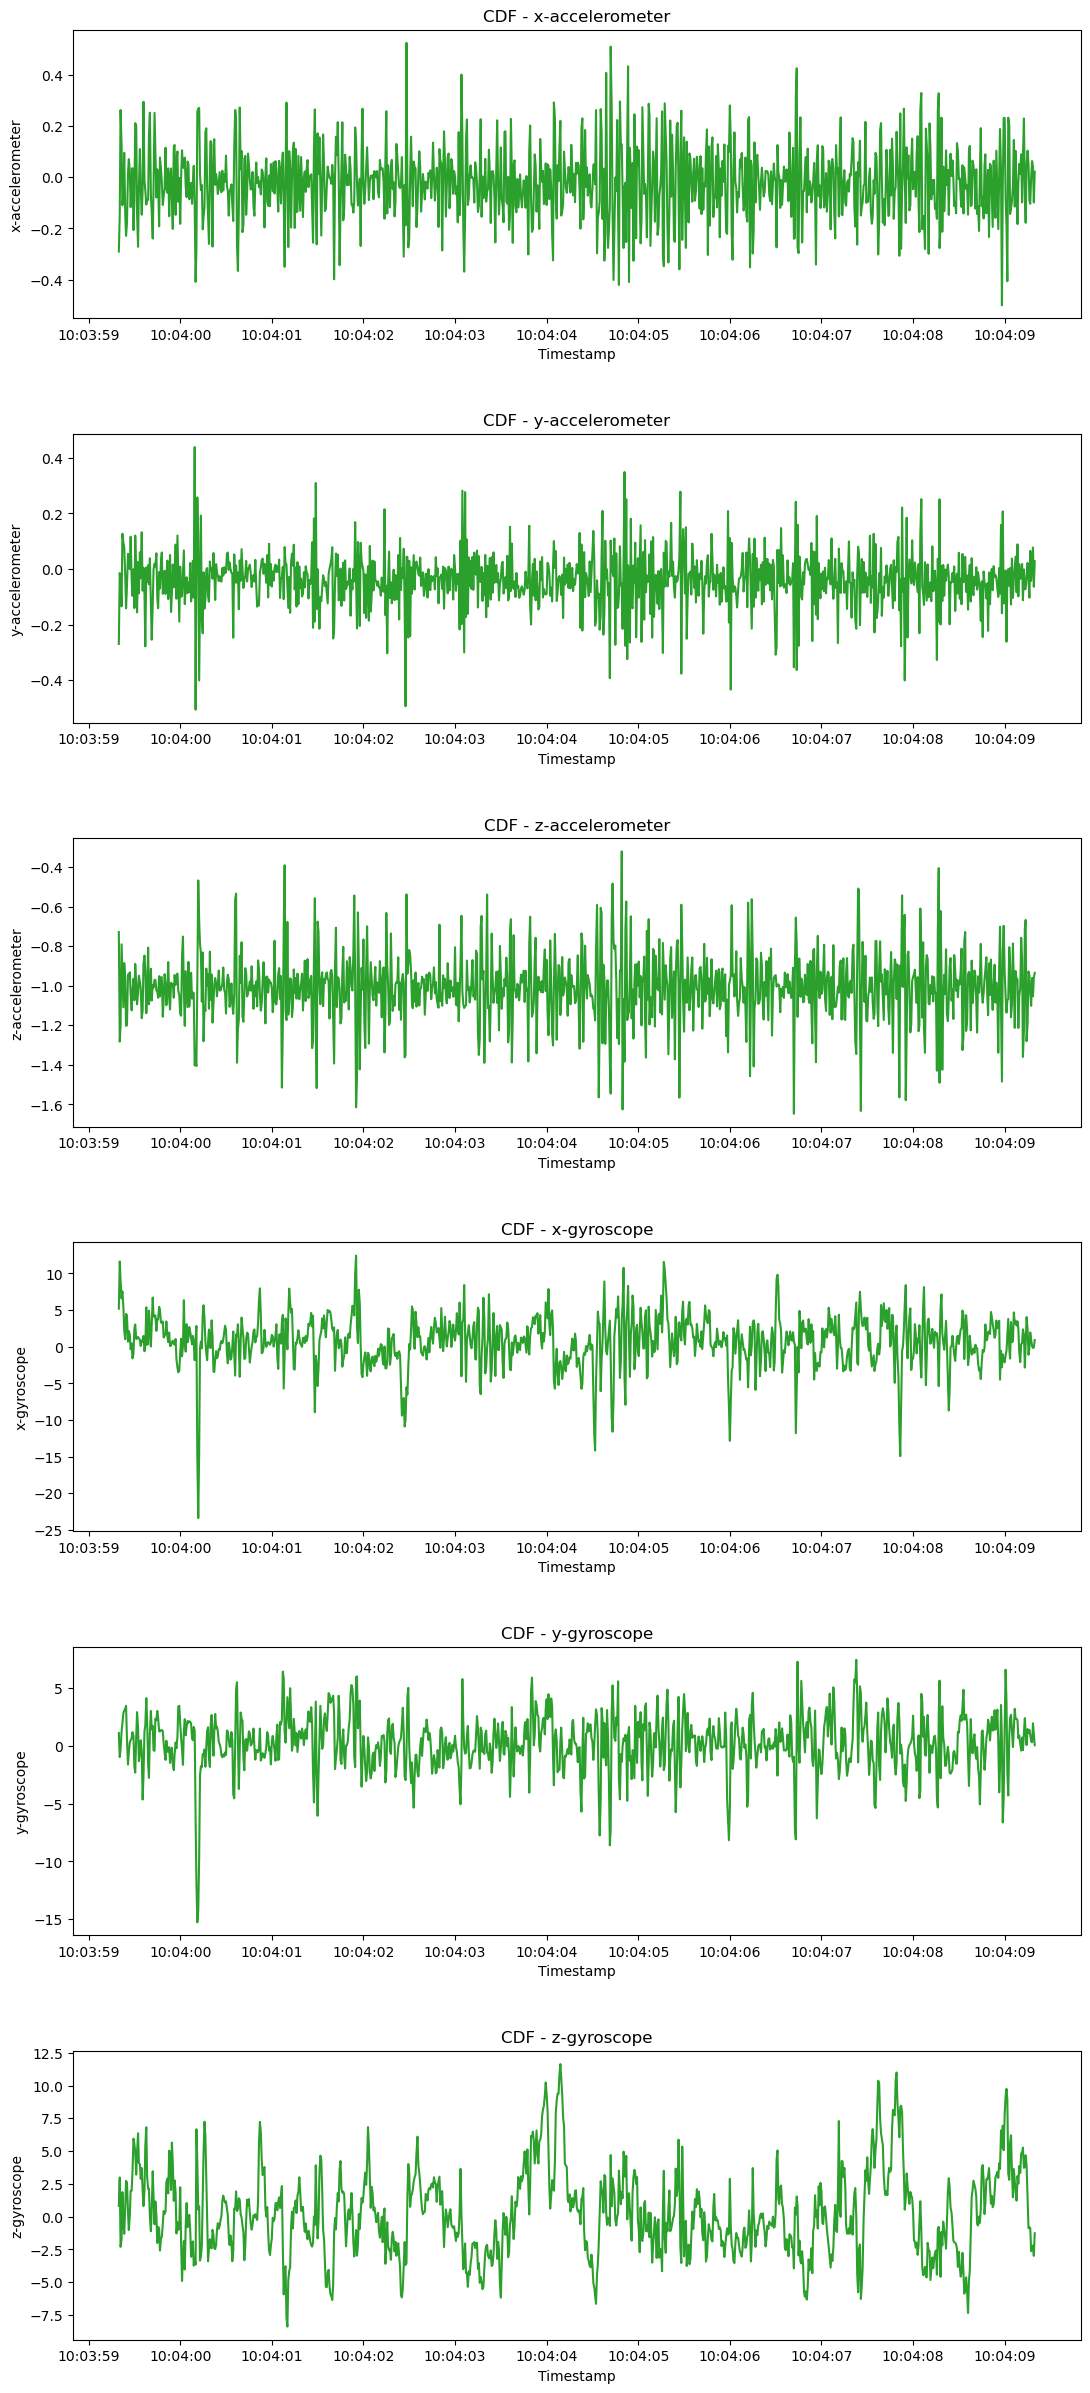

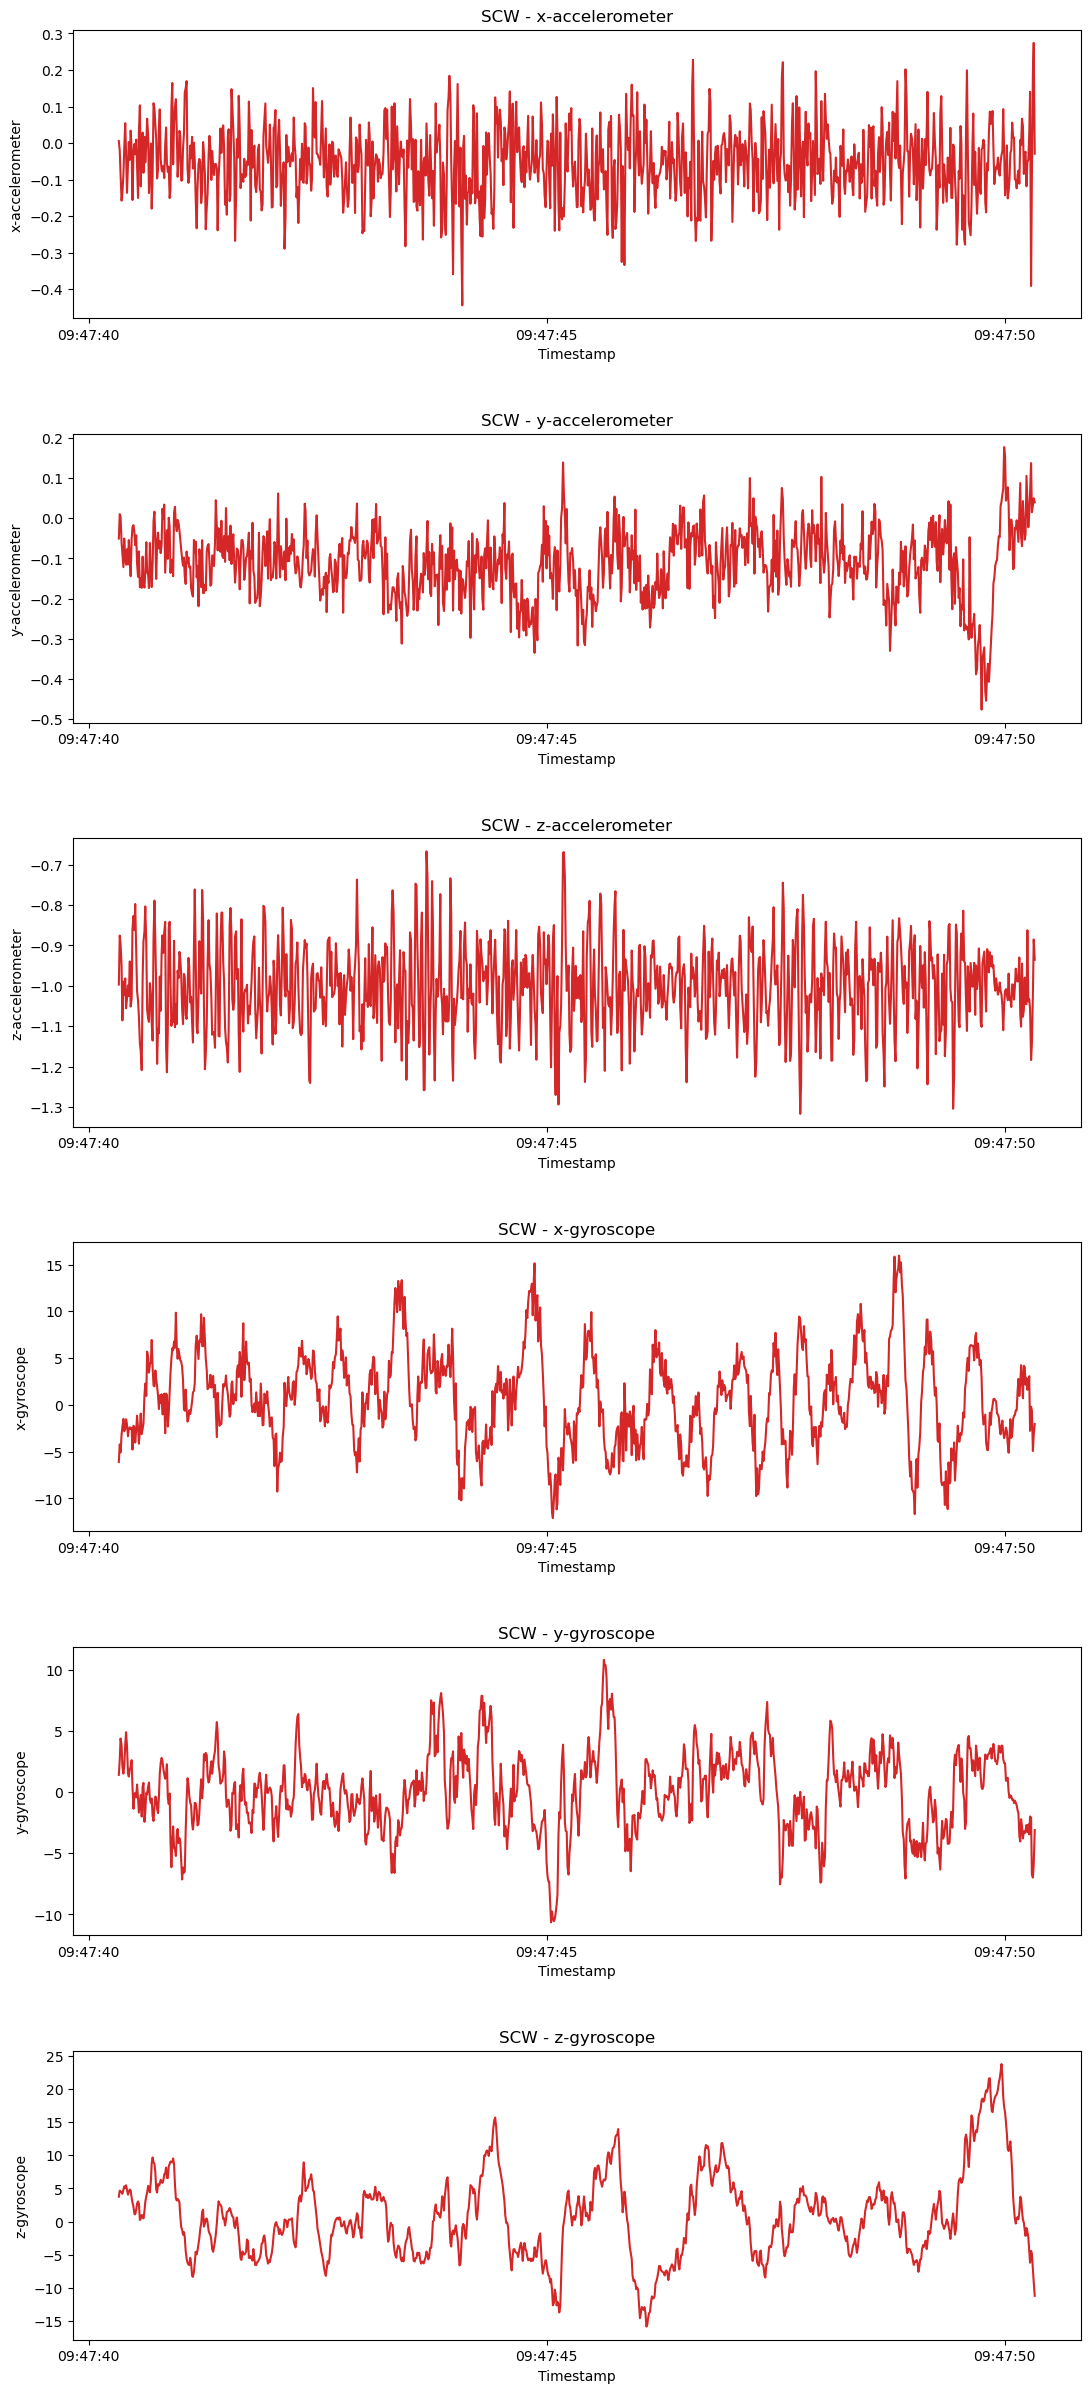

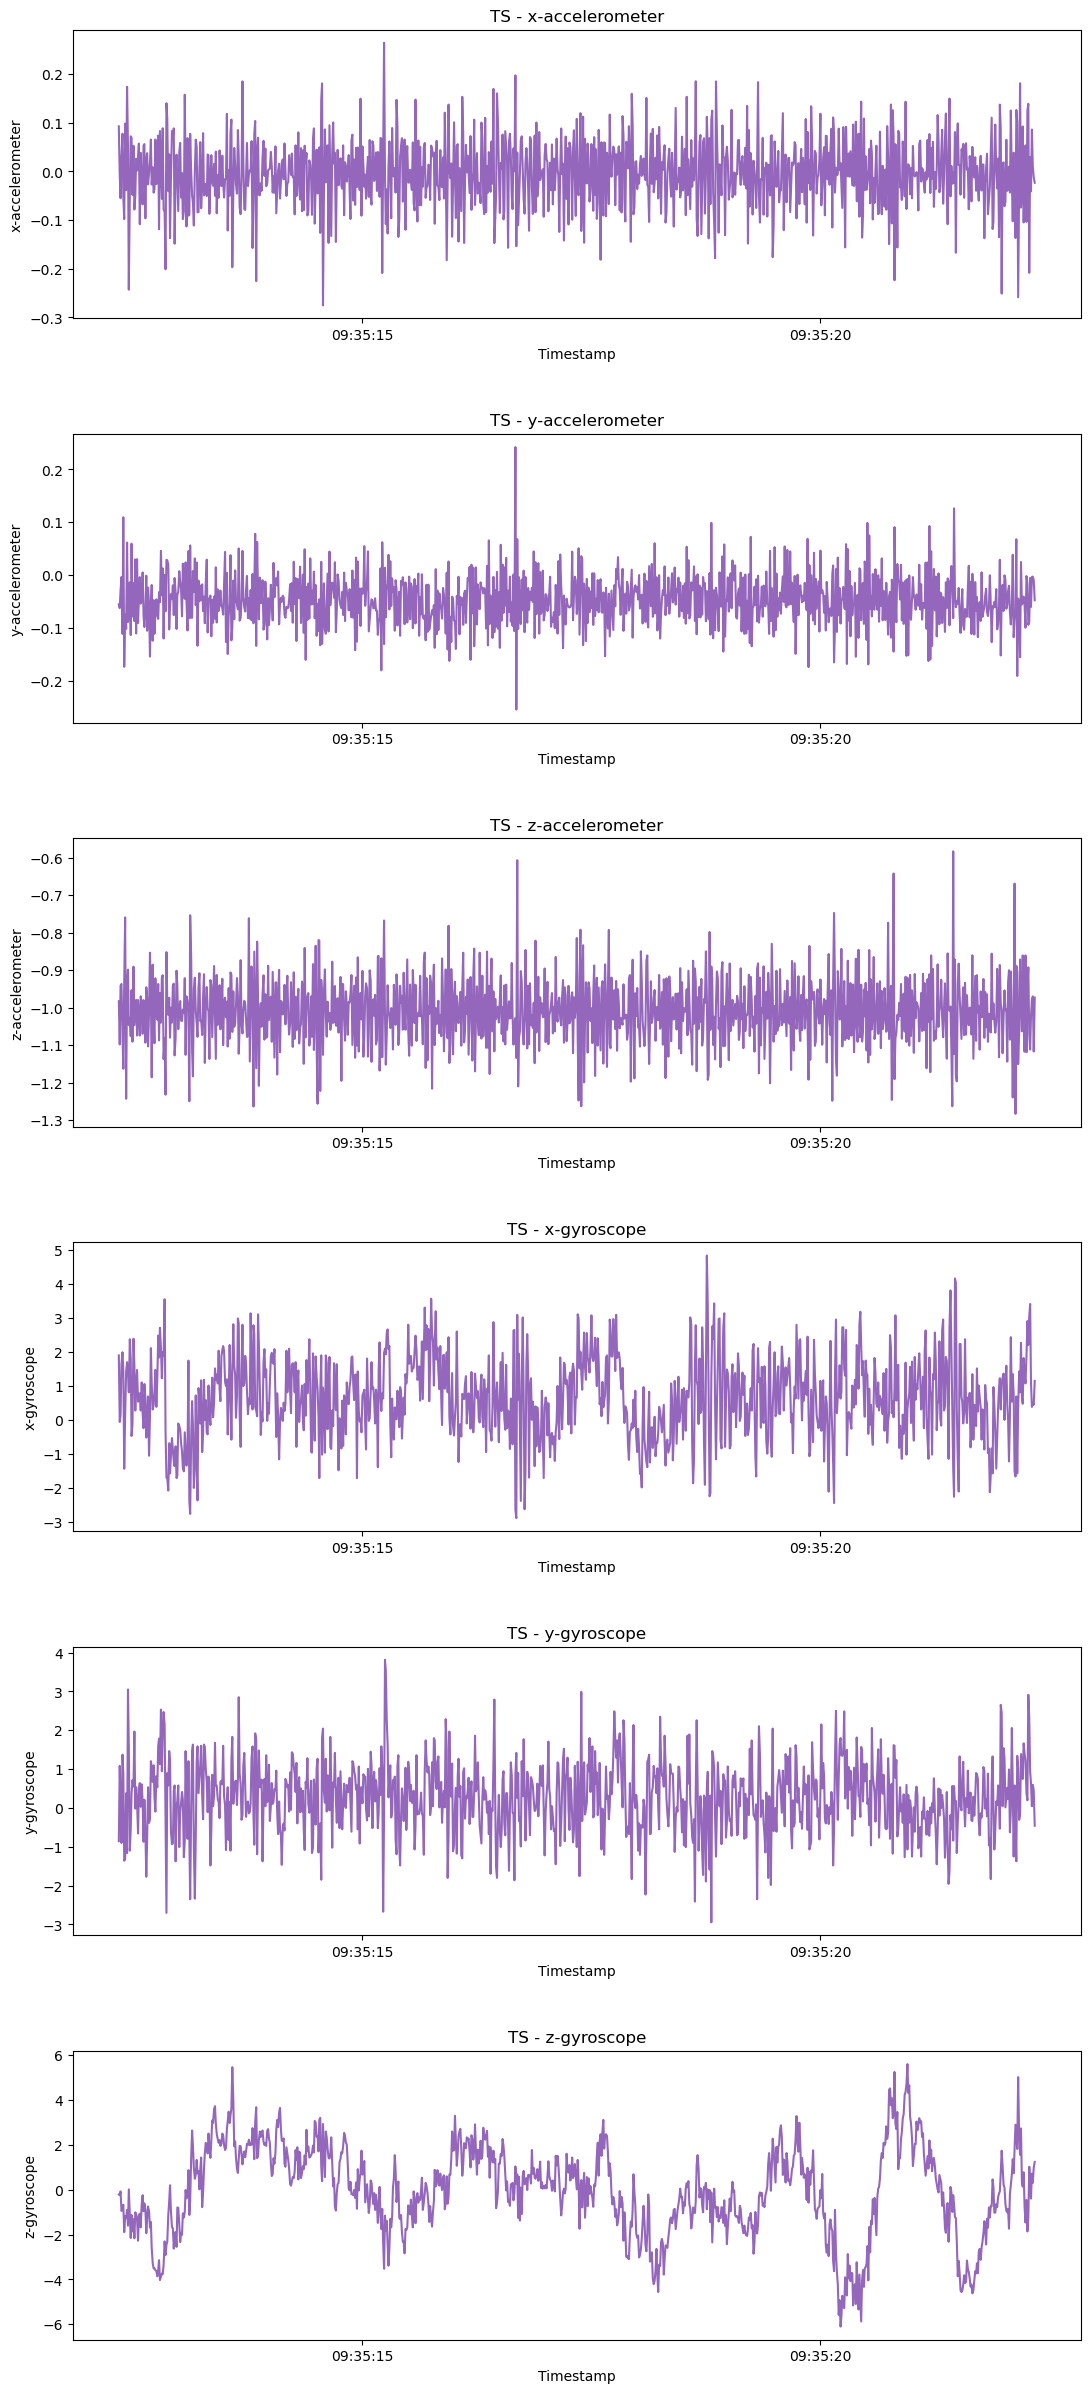

In [26]:
# All plots at once
import matplotlib # For defining color palette

color_palette = matplotlib.colormaps.get_cmap('tab10') # Define a color palette

for color_index, (table_name, table) in enumerate(dict_of_tables_10_seconds.items()):
    fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})
    
    for i, feature in enumerate(table.columns[1:], 0):  # Skipping the timestamp column:
        color = color_palette(color_index)  # Get color from the palette
        
        ax[i].plot(table['Timestamp'], table[feature], color=color)
        ax[i].set_title(f'{table_name} - {feature}')  # Adding table_name to the title
        ax[i].set_xlabel('Timestamp')
        ax[i].set_ylabel(feature)
    
    plt.show()


#### Section E-10 Box plot

In [27]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


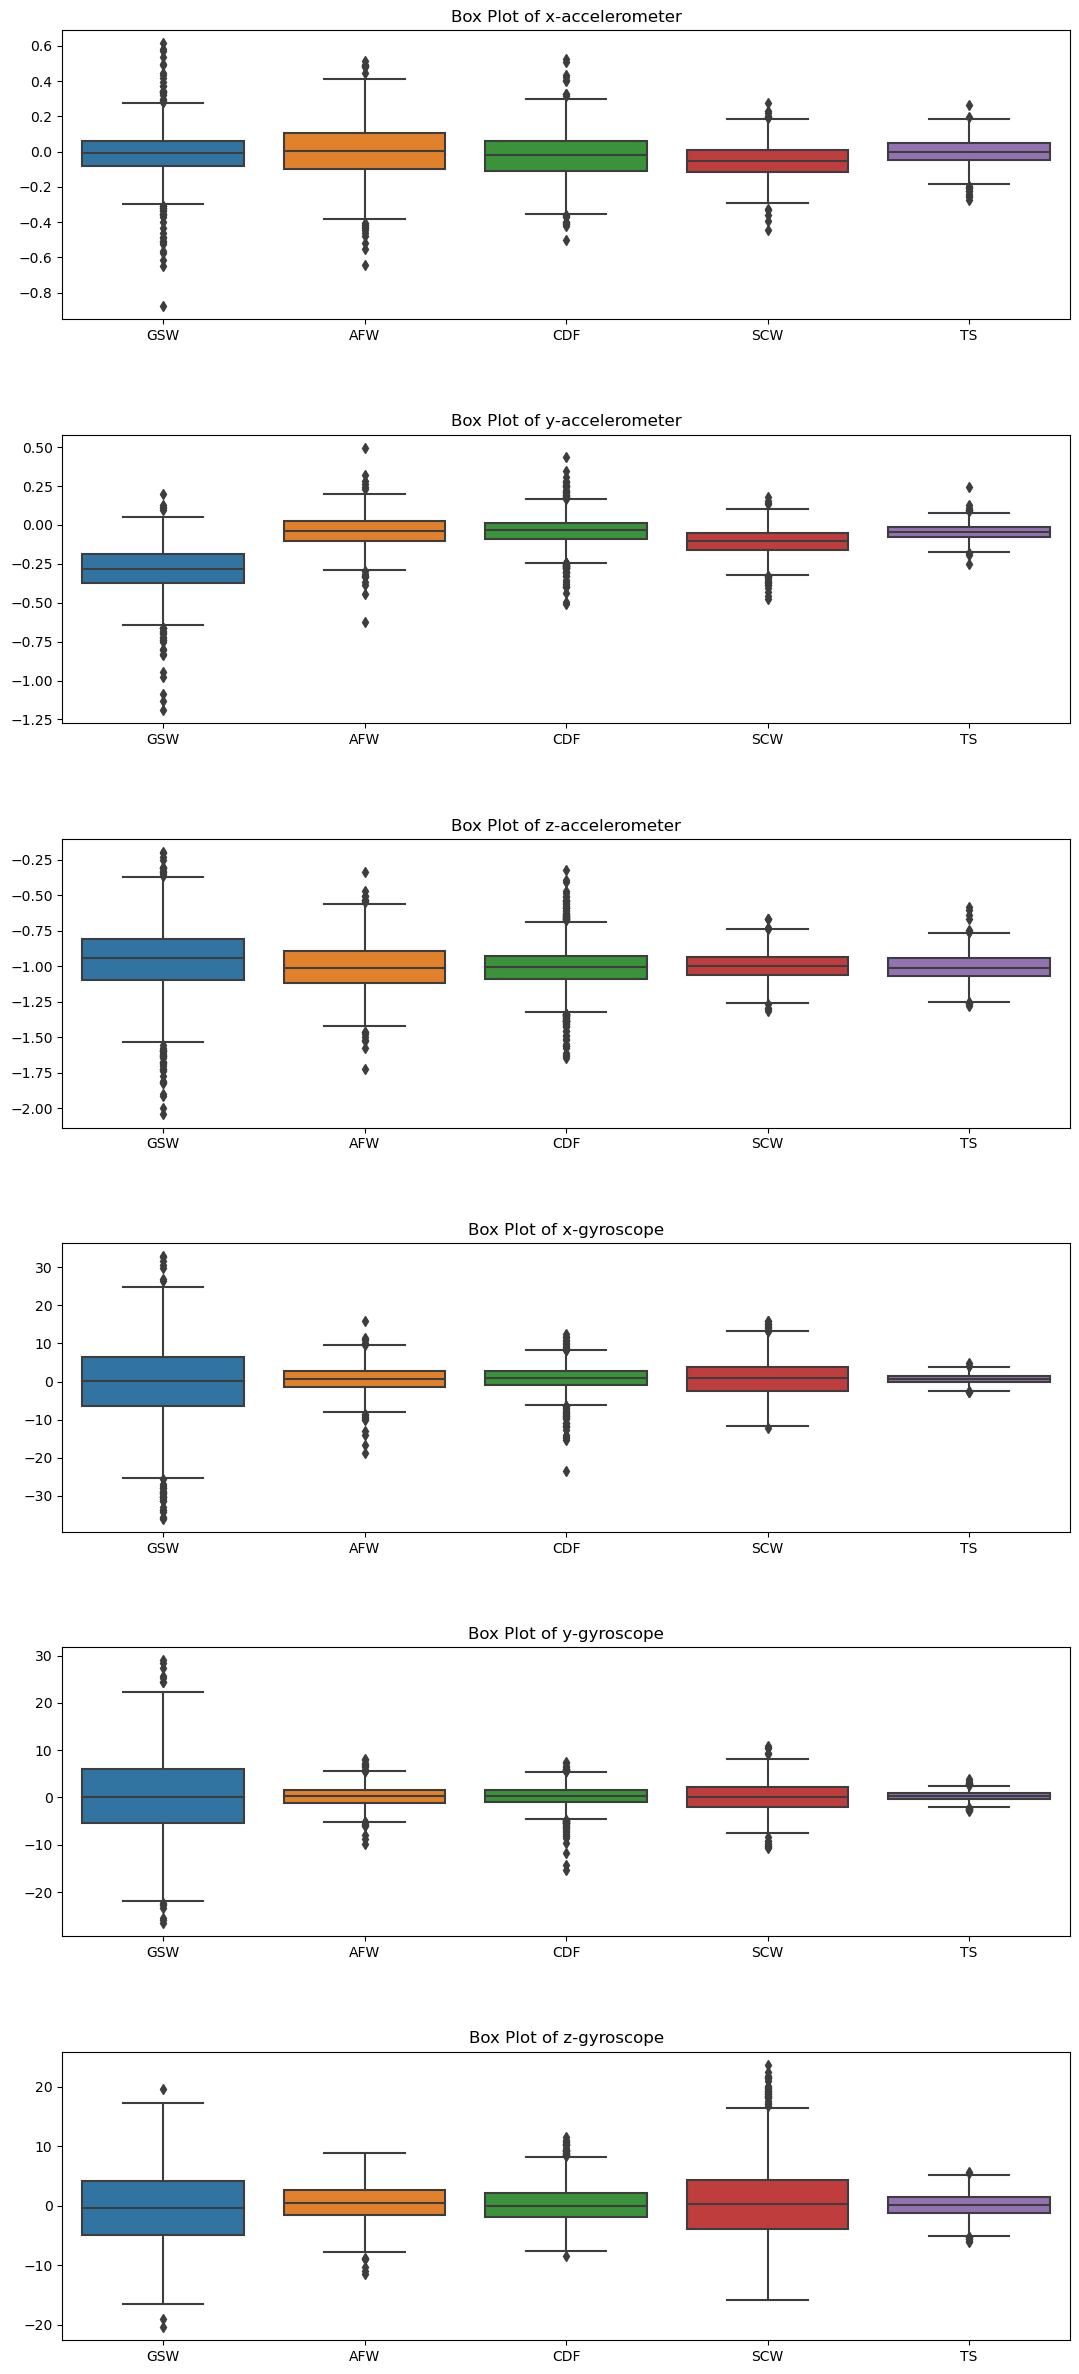

In [28]:
import seaborn as sns  # Importing seaborn for statistical visualization
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_tables_10_seconds['GSW'].columns[1:]

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_tables_10_seconds['GSW'][feature],
                                 'AFW': dict_of_tables_10_seconds['AFW'][feature],
                                 'CDF': dict_of_tables_10_seconds['CDF'][feature],
                                 'SCW': dict_of_tables_10_seconds['SCW'][feature],
                                 'TS': dict_of_tables_10_seconds['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CDF', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


## Section F - Data Preprocessing

#### Section F-1 Concatenation and annotation

In [29]:
# Initialize an empty list to store concatenated DataFrames
concatenated_dfs = []

# Iterate through the dictionary of tables
for table_name, table in dict_of_tables.items():
    # Add a new column 'label' with the table name
    table = table.copy() # Make a new copy to mute warnings 
    
    table.loc[:, 'Surface_Type'] = table_name
    # Append the DataFrame to the list
    concatenated_dfs.append(table)

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(concatenated_dfs, ignore_index=True)



In [30]:
concatenated_df.sample(10) # take random 10 rows to check the labels

Timestamp  x-accelerometer  y-accelerometer  \
2334  2024-03-20 10:27:46.349         0.084473         0.004395   
12924 2024-03-20 09:48:00.580        -0.150146         0.107422   
17567 2024-03-20 09:35:19.940         0.042236        -0.092773   
11357 2024-03-20 09:47:44.950         0.052979        -0.065918   
11737 2024-03-20 09:47:48.740         0.056152        -0.205566   
13885 2024-03-20 09:48:10.170        -0.149902        -0.246338   
7112  2024-03-20 10:04:01.420         0.005615        -0.054932   
9528  2024-03-20 10:04:25.530        -0.133545        -0.081543   
17826 2024-03-20 09:35:22.520         0.113525         0.025879   
16440 2024-03-20 09:48:35.669        -0.040283         0.060791   

       z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope Surface_Type  
2334         -1.147705     1.571655     3.173828    -0.488281          AFW  
12924        -1.079102     4.760742     0.457764    -2.227783          SCW  
17567        -1.102051     1.327515     0.213623    -0.869751           TS  
11357        -1.050781     5.325317    -2.380371    -6.729125          SCW  
11737        -1.041748     7.049560     2.441406    -0.473022          SCW  
13885        -0.845215     7.492065   -17.272949   -48.538204          SCW  
7112         -0.967529     3.417969     2.090454    -1.892090          CDF  
9528         -1.114990    -0.808716     0.564575    -7.904052          CDF  
17826        -1.001953     0.274658    -0.152588     0.061035           TS  
16440        -1.002197   -10.650634   -18.417358   -46.356197          SCW

#### Section F-2 Merging Tables


##### Previously, we analyzed only a portion of the data collected by one team member. Now, we will combine all the data gathered by every team member for our analysis.

In [31]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('../datasets/final/GSW.csv')

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/final/AFW.csv') 

# Concerete Dry Flat Surface DataFrame
CFD = pd.read_csv('../datasets/final/CFD.csv') 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('../datasets/final/SCW.csv')

# Tile Smooth Surface DataFrame
TS = pd.read_csv('../datasets/final/TS.csv')

In [32]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_completed_tables = {'GSW': GSW, 'AFW': AFW, 'CFD': CFD, 'SCW': SCW, 'TS': TS}

In [33]:
# concatenate all tables tegother

masterList = []

for table_name, table in dict_of_completed_tables.items():
    masterList.append(table)

# dict_of_completed_tables['TS']

In [34]:
masterTable = pd.concat(masterList, ignore_index=True)
masterTable

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0            -0.028809        -0.299805        -0.958252  1.281738  1.068115   
1            -0.016357        -0.300293        -0.949219  1.373291  0.991821   
2            -0.023438        -0.287109        -0.953125  1.068115  0.717163   
3            -0.027832        -0.287354        -0.948730  0.839233  0.335693   
4             0.001465        -0.277832        -0.946533  0.946045  0.183105   
...                ...              ...              ...       ...       ...   
72726         0.016602        -0.080322        -0.970215  1.251221  0.396728   
72727        -0.008789        -0.092773        -1.009033  1.617432  0.656128   
72728         0.013428        -0.066162        -0.994141  1.907349  0.717163   
72729        -0.018311        -0.072998        -1.035645  1.754761  0.686645   
72730        -0.002197        -0.045898        -1.023193  1.922607  0.106812   

         z gyro surface  
0      4.928589   grass  
1      5.004883   grass  
2      4.745483   grass  
3      4.699707   grass  
4      4.608154   grass  
...         ...     ...  
72726  2.548218    tile  
72727  3.036499    tile  
72728  3.158569    tile  
72729  2.975464    tile  
72730  3.265381    tile  

[72731 rows x 7 columns]

#### Section F-3 Checking consistency

In [35]:
# checking if there is missing value
masterTable.isna().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

`The dataset does not include any missing values.`

#### Section F - 4 Exploring Values Distribution

In [36]:
masterTable.describe()

x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     72731.000000     72731.000000     72731.000000  72731.000000   
mean         -0.018446        -0.091302        -1.000986      0.629918   
std           0.110704         0.122685         0.127179      5.379880   
min          -0.909912        -1.190186        -2.301758    -54.412838   
25%          -0.079102        -0.139404        -1.061279     -1.007080   
50%          -0.017334        -0.069092        -1.001465      0.747681   
75%           0.038086        -0.018066        -0.937744      2.593994   
max           1.026123         0.534912        -0.100342     38.436890   

             y gyro        z gyro  
count  72731.000000  72731.000000  
mean       0.248119      0.074384  
std        3.751903      6.441651  
min      -35.552979    -66.802979  
25%       -0.976562     -2.288818  
50%        0.244141      0.030518  
75%        1.480102      2.441406  
max       47.164913     81.130974

`We noticed that there are variability in the distribution of numerical features`

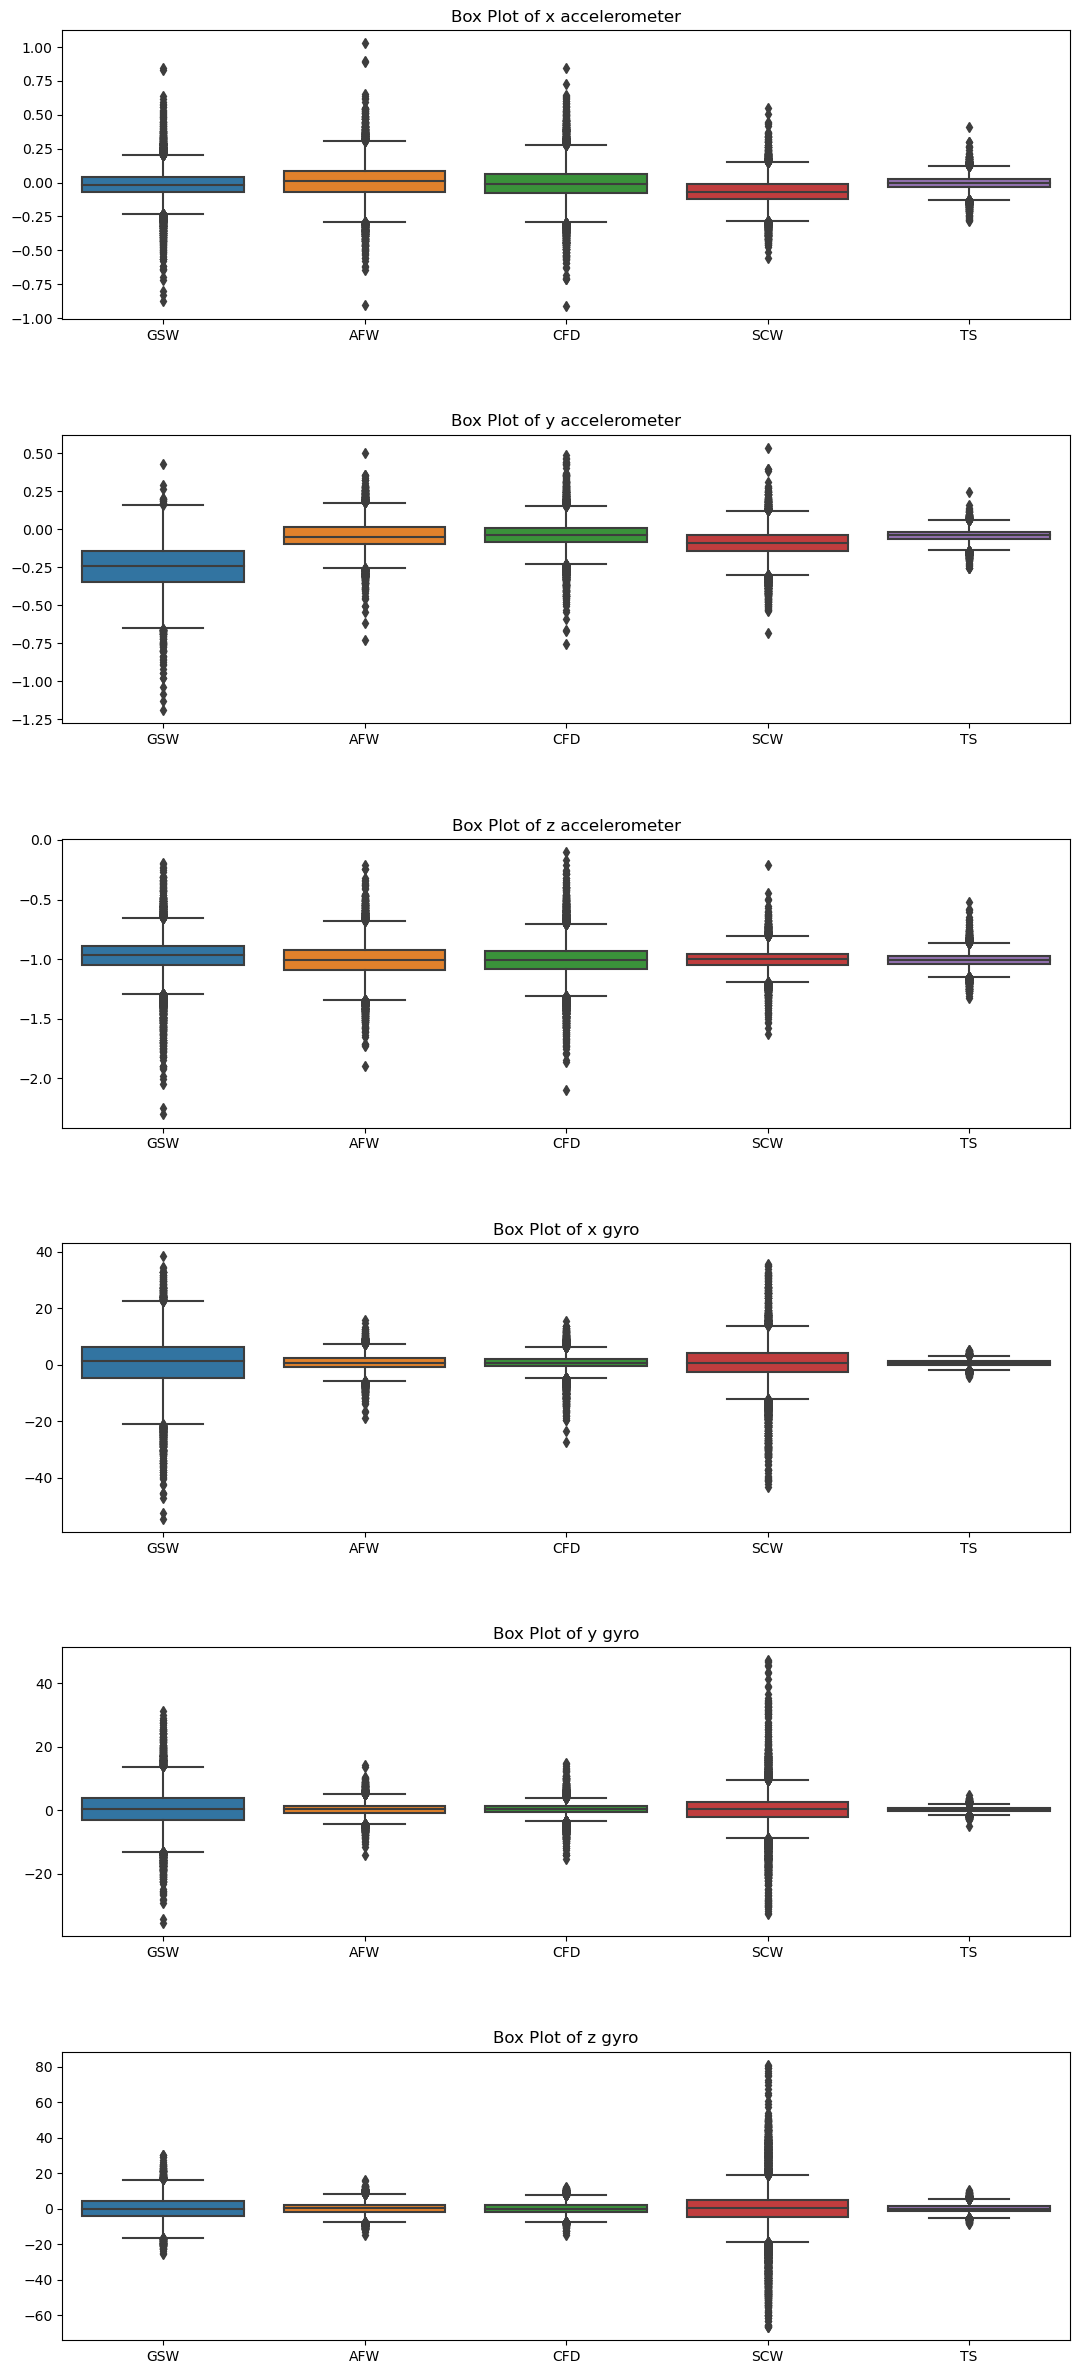

In [37]:
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_completed_tables['GSW'].columns[:6] # SLIGHT MODIFICATION HERE

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_completed_tables['GSW'][feature],
                                 'AFW': dict_of_completed_tables['AFW'][feature],
                                 'CFD': dict_of_completed_tables['CFD'][feature],
                                 'SCW': dict_of_completed_tables['SCW'][feature],
                                 'TS': dict_of_completed_tables['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CFD', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


`1 - We observe that the independent features have varying scales. Therefore, we will utilize scaling techniques to address this variability.`

`2 - We notice that the values consist of both negative and positive values, indicating that scaling using the StandardScaler is preferable over MinMax Scaling.`

`3 - The axes of the gyroscope exhibit larger standard deviations, suggesting that these features may have strong predictability for the target feature.`

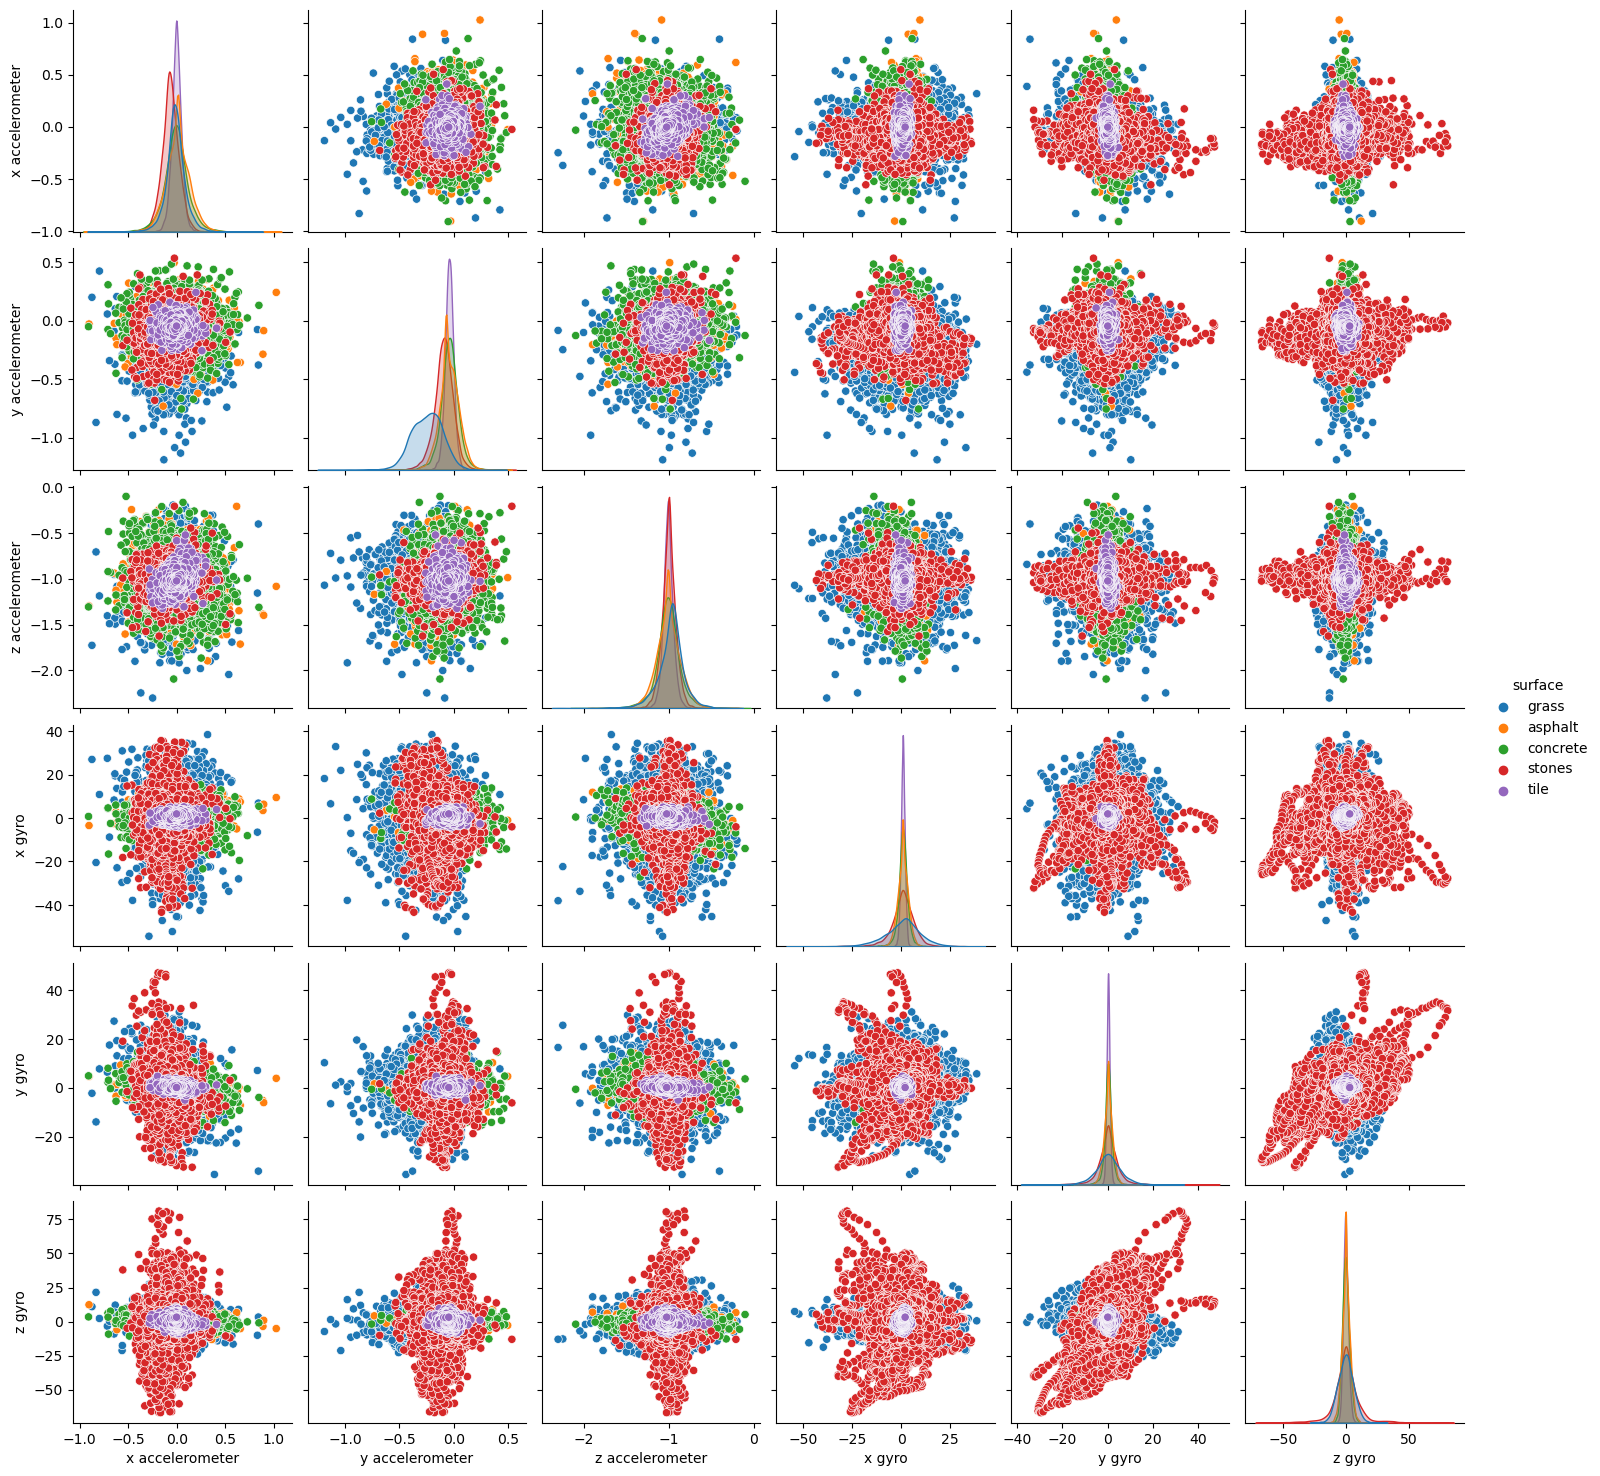

In [38]:
# see the distribtuion of features for each class (Surface)
import seaborn as sns # (if needed)
sns.pairplot(masterTable, hue='surface')
plt.show();


`The pairplot demonstrates distinguishable patterns between the different classes, indicating that applying classification using machine learning is possible. However, it's noteworthy that the asphalt class does not exhibit a unique pattern that is distinctly different from the other classes`

#### section F-5 studying the dependent feature

In [39]:
masterTable.surface.value_counts()

stones      16224
asphalt     15982
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

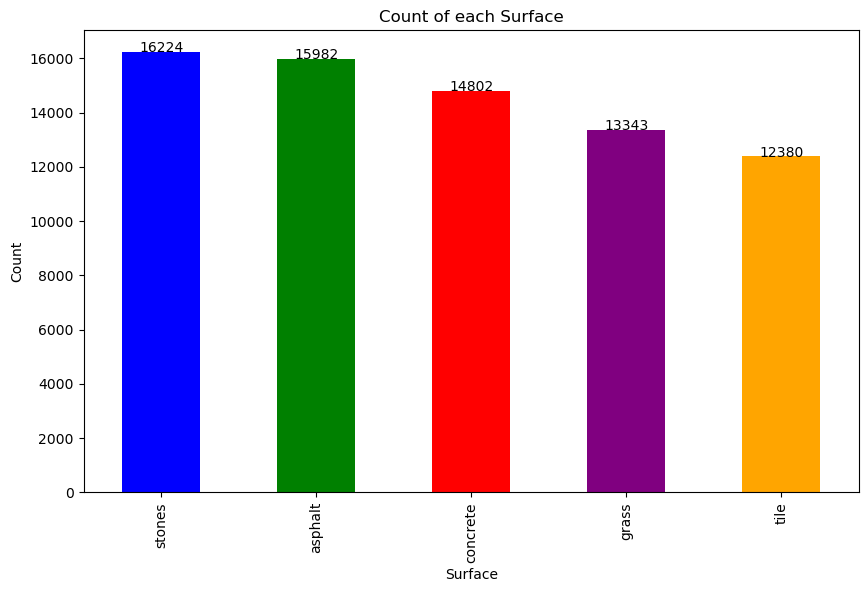

In [40]:
# masterTable.surface.value_counts() returns a Series with surface names as index and their counts as values
counts = masterTable.surface.value_counts()

# Define colors for each surface
colors = ['blue', 'green', 'red', 'purple', 'orange']  

# Plotting
plt.figure(figsize=(10, 6))  # Adjusting figure size
counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Surface')
plt.ylabel('Count')
plt.title('Count of each Surface')

# Adding total count on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

# Show plot
plt.show()


`The distribution of target feature is almost balanced, which is a good indicator that there is no need to use re-balancing techniques`

#### Section F - 6 Mapping target feature (Label-Encoding classes)

In [41]:
# Define the mapping
label_mapping = {
    'tile': 0,
    'grass': 1,
    'asphalt': 2,
    'concrete': 3,
    'stones': 4
}

# Map the labels using the dictionary
masterTable['Encoded_Surface'] = masterTable['surface'].map(label_mapping)

# Display the DataFrame with the new encoded labels
masterTable.sample(5)


x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
39023         0.147949        -0.066162        -1.060303 -6.988525  0.930786   
11348         0.096680        -0.179688        -1.158203  8.666992 -8.377075   
10449        -0.245605        -0.186523        -1.060791 -4.577637  3.173828   
7650          0.009033        -0.094238        -0.721436 -5.859375 -7.339477   
68999        -0.108398         0.017334        -0.957031  1.678467  0.244141   

         z gyro   surface  Encoded_Surface  
39023  0.579834  concrete                3  
11348 -0.915527     grass                1  
10449 -4.928589     grass                1  
7650   5.798339     grass                1  
68999  1.693725      tile                0

In [42]:
# Chkecing that value counts matches
masterTable.Encoded_Surface.value_counts()

4    16224
2    15982
3    14802
1    13343
0    12380
Name: Encoded_Surface, dtype: int64

In [43]:
masterTable.surface.value_counts()

stones      16224
asphalt     15982
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

In [49]:
# now we can remove the string lable 'Surface_Type'
masterTable.drop('surface', axis =1 , inplace = True)

KeyError: "['surface'] not found in axis"

#### Section F - 7 checking multicollinearity

In [45]:
###
data = masterTable.copy()
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         15 non-null     object 
 1   feature2         15 non-null     object 
 2   correlation      15 non-null     float64
 3   abs_correlation  15 non-null     float64
dtypes: float64(2), object(2)
memory usage: 612.0+ bytes


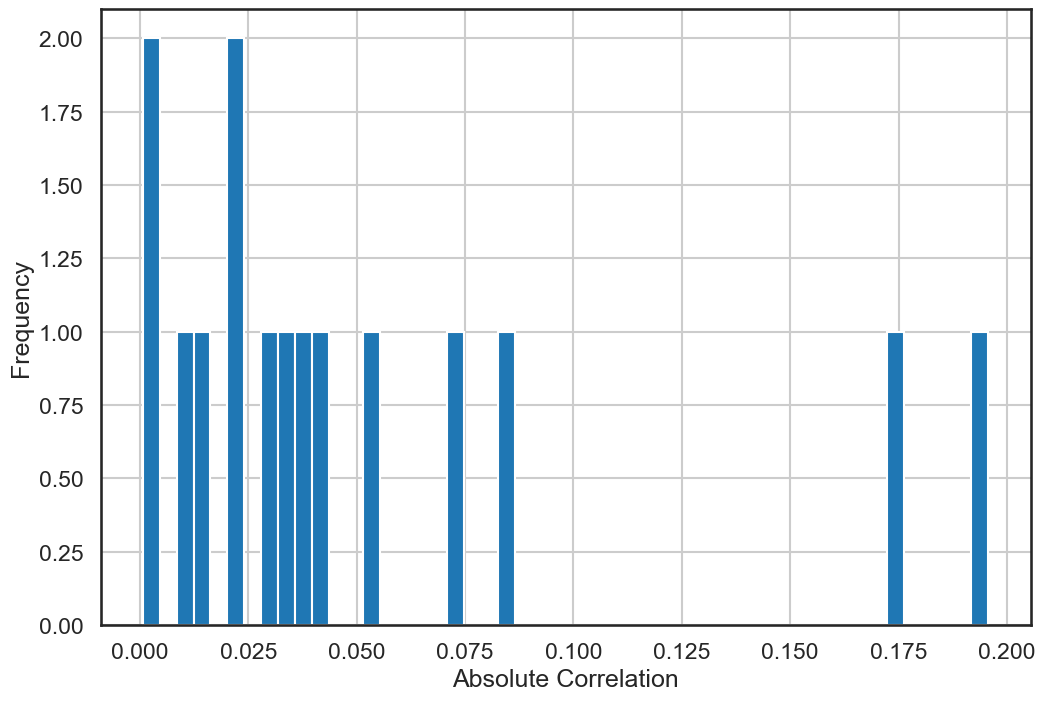

In [50]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

`We have observed that there is no multicollinearity among the features. This finding indicates that we can confidently utilize all the features in the prediction process."`

In [47]:
## ML Section 

In [48]:
# from sklearn.model_selection import train_test_split

# # Split the data into features (X) and target labels (y)
# X = masterTable.drop('Encoded_Surface', axis = 1)
# y = masterTable['Encoded_Surface']

# # Split the data into training (75%) and test (25%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# # Display the shapes of the resulting sets
# print("Training set shape:", X_train.shape, y_train.shape)
# print("Test set shape:", X_test.shape, y_test.shape)


In [65]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both training and test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Display the first few rows of the scaled training data to verify the transformation
# print("Scaled Training Data:")
# print(X_train_scaled[:5])

# # Display the first few rows of the scaled test data to verify the transformation
# print("Scaled Test Data:")
# print(X_test_scaled[:5])


In [66]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# # Initialize classifiers
# log_reg = LogisticRegression(random_state=42)
# decision_tree = DecisionTreeClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)

# # Train and evaluate Logistic Regression
# log_reg.fit(X_train_scaled, y_train)
# log_reg_train_preds = log_reg.predict(X_train_scaled)
# log_reg_test_preds = log_reg.predict(X_test_scaled)
# log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
# log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)

# # Train and evaluate Decision Tree
# decision_tree.fit(X_train_scaled, y_train)
# decision_tree_train_preds = decision_tree.predict(X_train_scaled)
# decision_tree_test_preds = decision_tree.predict(X_test_scaled)
# decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
# decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

# # Train and evaluate XGBoost
# xgb.fit(X_train_scaled, y_train)
# xgb_train_preds = xgb.predict(X_train_scaled)
# xgb_test_preds = xgb.predict(X_test_scaled)
# xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
# xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

# # Display accuracies
# print("Logistic Regression - Train Accuracy:", log_reg_train_accuracy)
# print("Logistic Regression - Test Accuracy:", log_reg_test_accuracy)
# print("Decision Tree - Train Accuracy:", decision_tree_train_accuracy)
# print("Decision Tree - Test Accuracy:", decision_tree_test_accuracy)
# print("XGBoost - Train Accuracy:", xgb_train_accuracy)
# print("XGBoost - Test Accuracy:", xgb_test_accuracy)


In [67]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Calculate precision, recall, and F1-score for Logistic Regression
# log_reg_precision = precision_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)
# log_reg_recall = recall_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)
# log_reg_f1 = f1_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)

# # Calculate precision, recall, and F1-score for Decision Tree
# decision_tree_precision = precision_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)
# decision_tree_recall = recall_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)
# decision_tree_f1 = f1_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)

# # Calculate precision, recall, and F1-score for XGBoost
# xgb_precision = precision_score(y_test, xgb_test_preds, average='weighted', zero_division=0)
# xgb_recall = recall_score(y_test, xgb_test_preds, average='weighted', zero_division=0)
# xgb_f1 = f1_score(y_test, xgb_test_preds, average='weighted', zero_division=0)

# # Display precision, recall, and F1-score for each classifier
# print("Logistic Regression - Precision:", log_reg_precision)
# print("Logistic Regression - Recall:", log_reg_recall)
# print("Logistic Regression - F1-score:", log_reg_f1)
# print("Decision Tree - Precision:", decision_tree_precision)
# print("Decision Tree - Recall:", decision_tree_recall)
# print("Decision Tree - F1-score:", decision_tree_f1)
# print("XGBoost - Precision:", xgb_precision)
# print("XGBoost - Recall:", xgb_recall)
# print("XGBoost - F1-score:", xgb_f1)


In [61]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'min_child_weight': [1, 3, 5]
# }

# # Initialize XGBoost classifier
# xgb = XGBClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Perform grid search
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# # Train a new XGBoost classifier with the best parameters
# best_xgb = XGBClassifier(**best_params, random_state=42)
# best_xgb.fit(X_train_scaled, y_train)

# # Evaluate the new XGBoost classifier
# best_xgb_test_preds = best_xgb.predict(X_test_scaled)
# best_xgb_test_accuracy = accuracy_score(y_test, best_xgb_test_preds)

# # Display the best parameters and the improved accuracy score
# print("Best Parameters:", best_params)
# print("Improved Test Accuracy:", best_xgb_test_accuracy)


In [62]:
# # Calculate precision, recall, and F1-score for XGBoost
# xgb_precision = precision_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)
# xgb_recall = recall_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)
# xgb_f1 = f1_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)

# # Display precision, recall, and F1-score for each classifier
# print("XGBoost - Precision:", xgb_precision)
# print("XGBoost - Recall:", xgb_recall)
# print("XGBoost - F1-score:", xgb_f1)


In [63]:
# # Plot confusion matrix for XGBoost
# xgb_cm = confusion_matrix(y_test, best_xgb_test_preds)
# plt.figure(figsize=(10, 8))
# sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix - XGBoost')
# plt.show()